# 한글 형태소 분석

In [7]:
## 1. jpype 설치하기
### - https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 사이트로 이동
### - 파이썬 버전에 맞는 JPype 1-1-1-2-cp38-win_amd64.whl 다운로드
### - 다운로드에서 PIP IINSTALL 파일명으로 설치

In [9]:
!python --version

Python 3.9.12


In [11]:
!pip install JPype1-1.4.0-cp39-cp39-win_amd64.whl

Processing d:\jupyter\jpype1-1.4.0-cp39-cp39-win_amd64.whl
JPype1 is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [13]:
# KoNLPy 설치
!pip install KoNLPy

In [19]:
from konlpy.tag import Kkma
tokenizer = Kkma()
text = tokenizer.morphs("카페에서의 여유 참 좋네요")
print(text)
text = tokenizer.pos("카페에서의 여유 참 좋네요")
print(text)
text = tokenizer.nouns("카페에서의 여유 참 좋네요")
print(text)

['카페', '에서', '의', '여유', '참', '좋', '네요']
[('카페', 'NNG'), ('에서', 'JKM'), ('의', 'JKG'), ('여유', 'NNG'), ('참', 'MAG'), ('좋', 'VA'), ('네요', 'EFN')]
['카페', '여유']


In [23]:
from konlpy.tag import Okt
okt = Okt()
text = '아버지가 방에 들어 가신다'
words = okt.normalize(text)
print(words)
ph_word = okt.phrases(text)
print(ph_word)
mo_word = okt.morphs(text)
print(mo_word)
pos_word = okt.pos(text)
print(pos_word)
non_word = okt.nouns(text)
print(non_word)

아버지가 방에 들어 가신다
['아버지']
['아버지', '가', '방', '에', '들어', '가신다']
[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어', 'Verb'), ('가신다', 'Verb')]
['아버지', '방']


In [50]:
file = open('동화_1.txt','r',encoding='utf-8')
text = file.read()
#print(text)
pos_word = okt.pos(text)
#print(pos_word)
non_word = []
count_word = {}
for word, value in pos_word:
    if value == 'Noun':
        if len(word) > 1 or word == '왕':
            non_word.append(word)
#print(non_word)
for word in non_word:
    if word not in count_word:
        count_word[word] = 1
    else:
        count_word[word] += 1
for word, count in count_word.items():
    if count >= 3:
        print(word,':',count)

나무꾼 : 4
하나 : 3
때문 : 6
나무 : 13
아기 : 14
동정녀 : 9
성모 : 18
마리아 : 29
아이 : 11
데리 : 5
하늘나라 : 10
천사 : 6
그녀 : 26
말씀 : 9
열쇠 : 7
어보 : 4
방문 : 13
소녀 : 27
시작 : 3
가운데 : 4
금지 : 8
사이 : 5
살짝 : 4
마음 : 3
거기 : 3
그때 : 3
자신 : 7
손가락 : 4
금빛 : 4
즉시 : 3
그것 : 3
들판 : 4
열매 : 3
다시 : 6
왕 : 11
처녀 : 3
다음 : 8
사랑 : 3
왕비 : 35
아들 : 5
아뇨 : 3
얘기 : 3
고백 : 3
재판 : 3


In [40]:
!pip install wordcloud

In [75]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [54]:
counts = Counter(non_word)
#print(counts)

top_30 = counts.most_common(30)
print(top_30)

[('왕비', 35), ('마리아', 29), ('소녀', 27), ('그녀', 26), ('성모', 18), ('아기', 14), ('나무', 13), ('방문', 13), ('아이', 11), ('왕', 11), ('하늘나라', 10), ('동정녀', 9), ('말씀', 9), ('금지', 8), ('다음', 8), ('열쇠', 7), ('자신', 7), ('때문', 6), ('천사', 6), ('다시', 6), ('데리', 5), ('사이', 5), ('아들', 5), ('나무꾼', 4), ('어보', 4), ('가운데', 4), ('살짝', 4), ('손가락', 4), ('금빛', 4), ('들판', 4)]


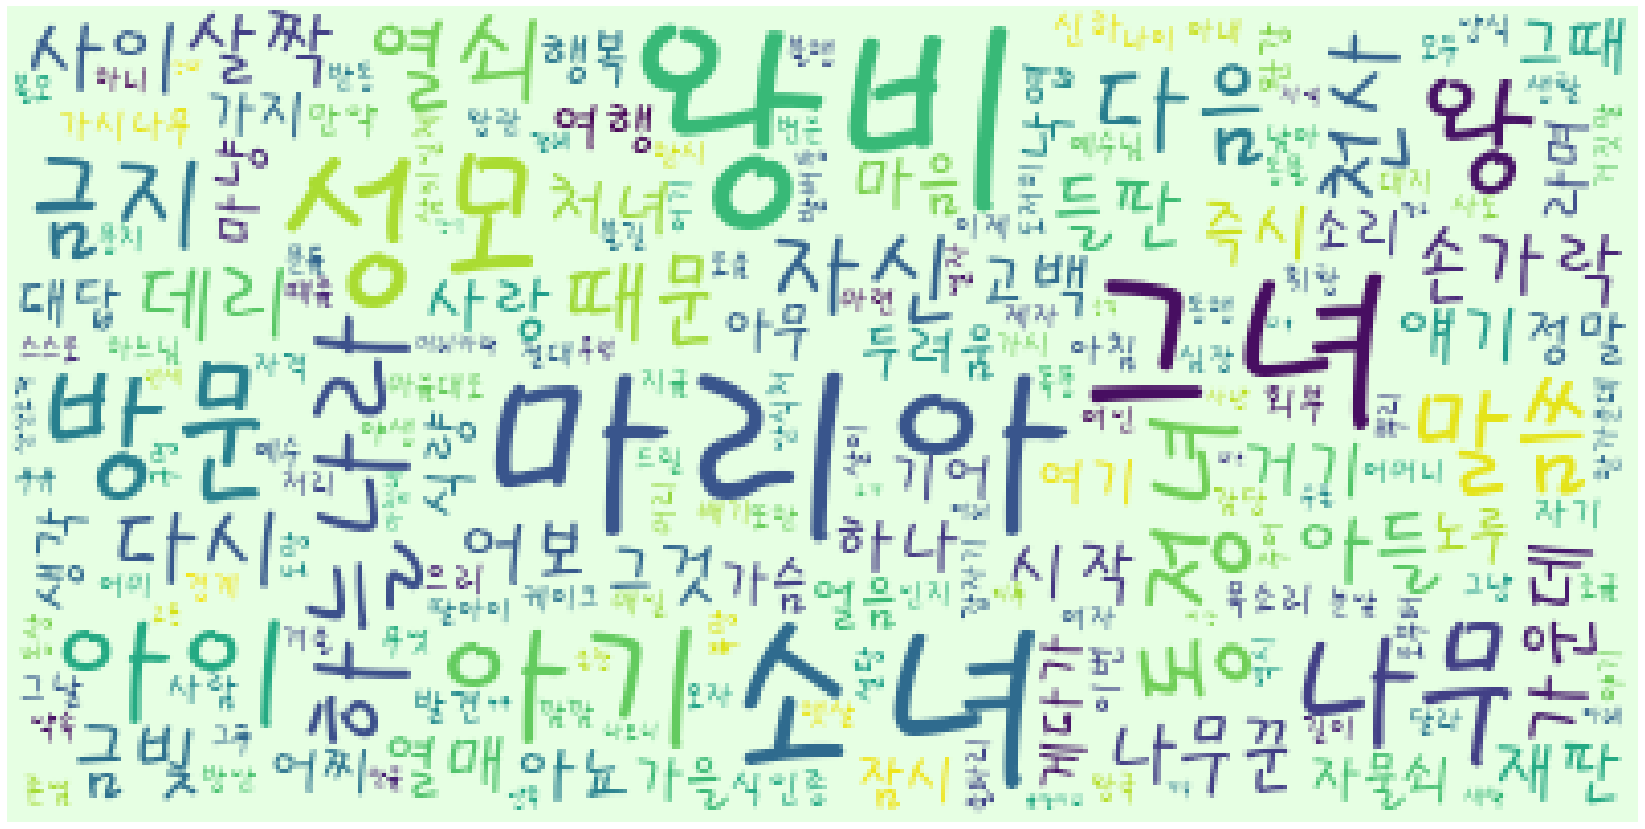

In [78]:
path = 'C:\Windows\Fonts\HMFMPYUN.TTF'
wc = WordCloud(font_path=path, background_color='#e6ffe3', max_font_size=60)
cloud = wc.generate_from_frequencies(dict(counts))
plt.figure(figsize=(60,15))
plt.axis('off')
plt.imshow(cloud)
plt.show()
cloud.to_file('성모마리아.png')

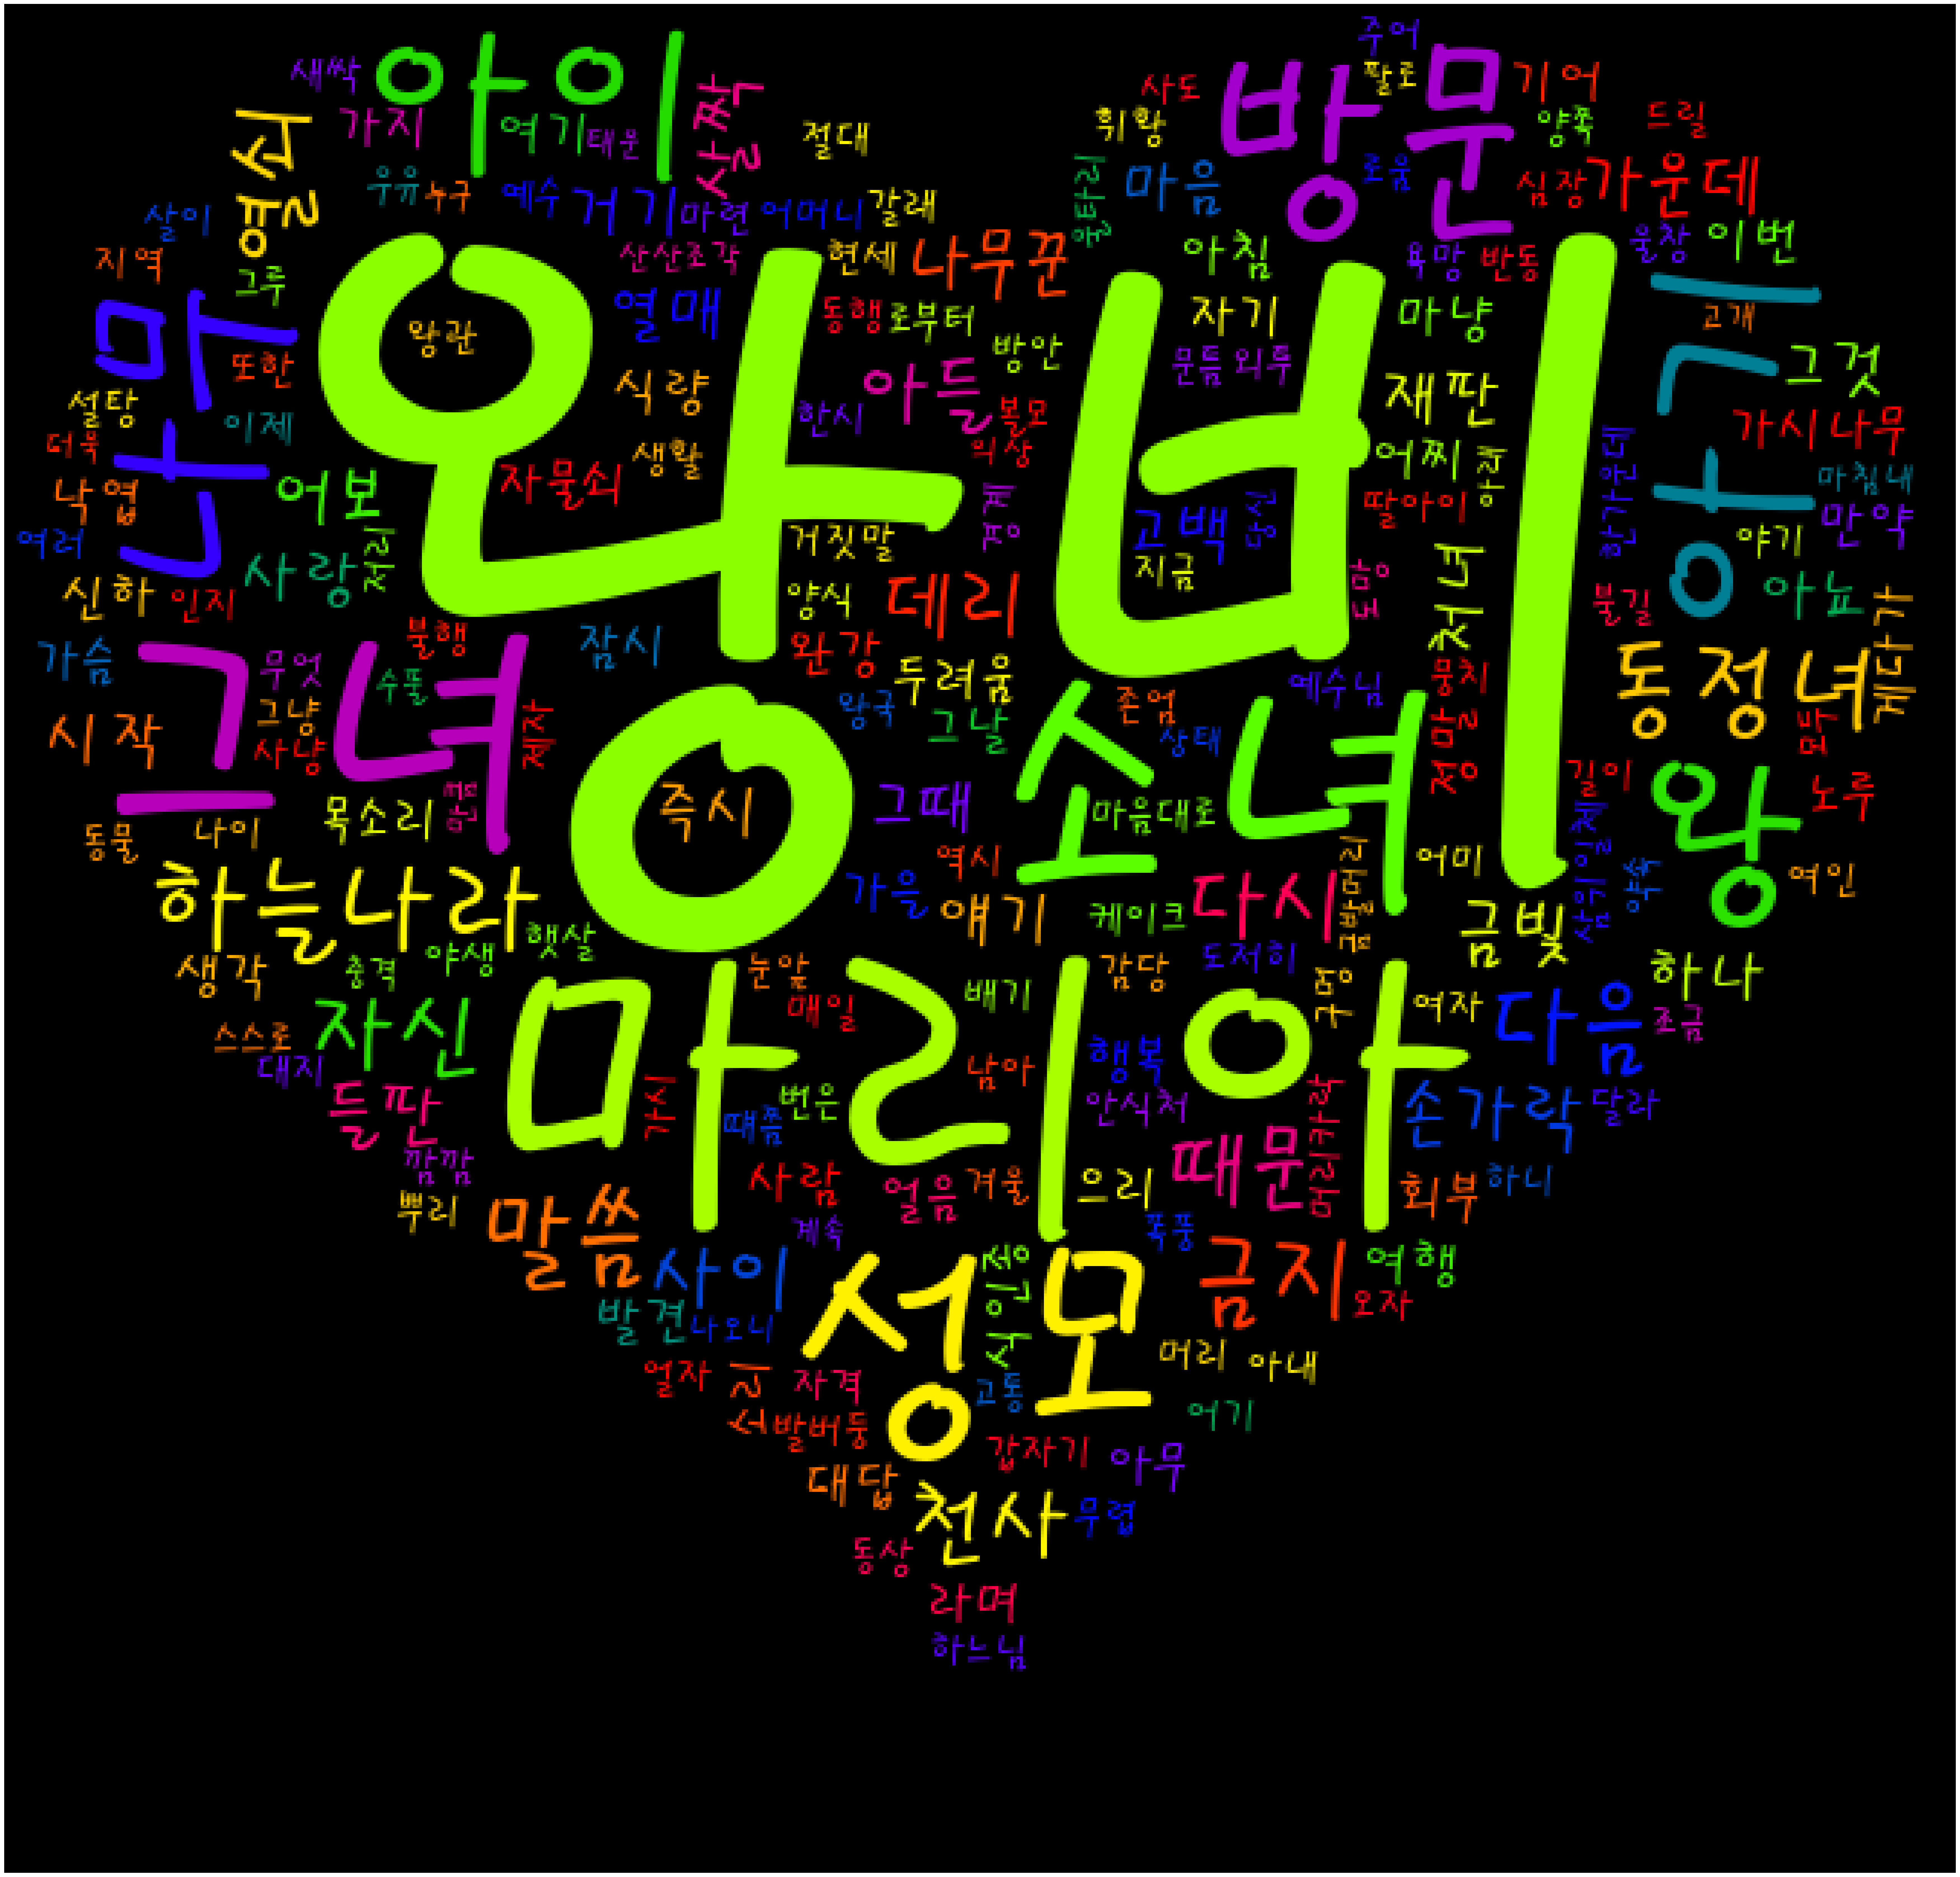

In [102]:
path = 'C:\Windows\Fonts\HMFMPYUN.TTF'
# wc = WordCloud(font_path=path, colormap='autumn', background_color='#e6ffe3', max_font_size=60)
# wc.width = 700
# wc.height = 700
# wc.mask = mask_arr
# wc.prefer_horizontal = True
# cloud = wc.generate_from_frequencies(dict(counts))

mask = Image.new("RGBA",(640,613), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
image = Image.open('heart.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400, mask=mask,colormap='prism').generate_from_frequencies(dict(counts))
plt.figure(figsize=(60,60), dpi=150)
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
#cloud.to_file('상암맛집_wc.png')
#또는
plt.savefig('Heart_Story.png', bbox_inches='tight', dpi=100)
plt.show()
